<a href="https://colab.research.google.com/github/wira29/PCVK_Ganjil_2023/blob/main/28_WiradarmaNB_Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Implementasikan 6 metode template matching pada OpenCV dengan menggunakan

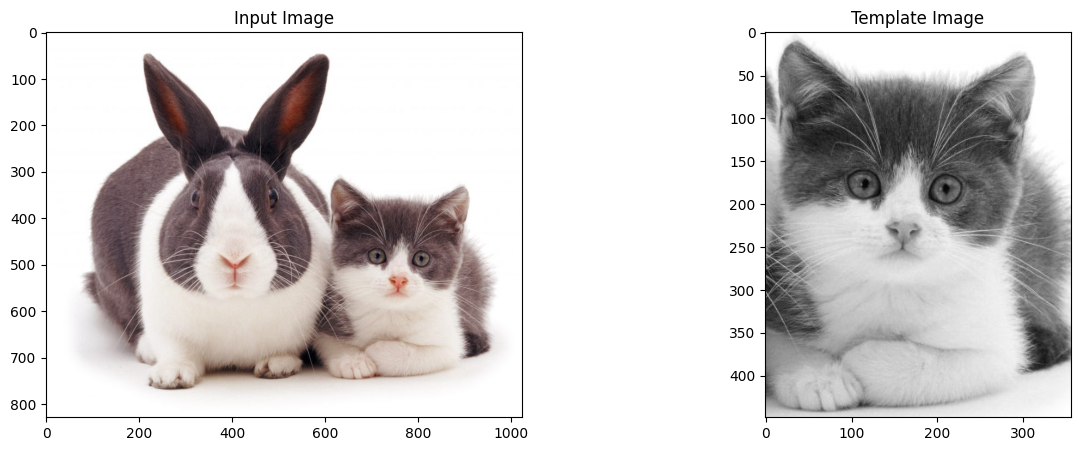

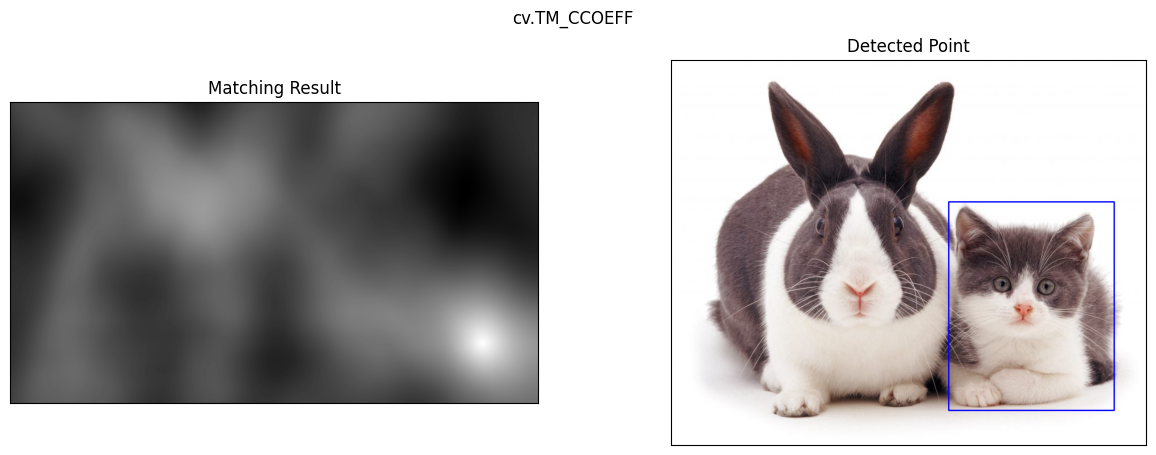

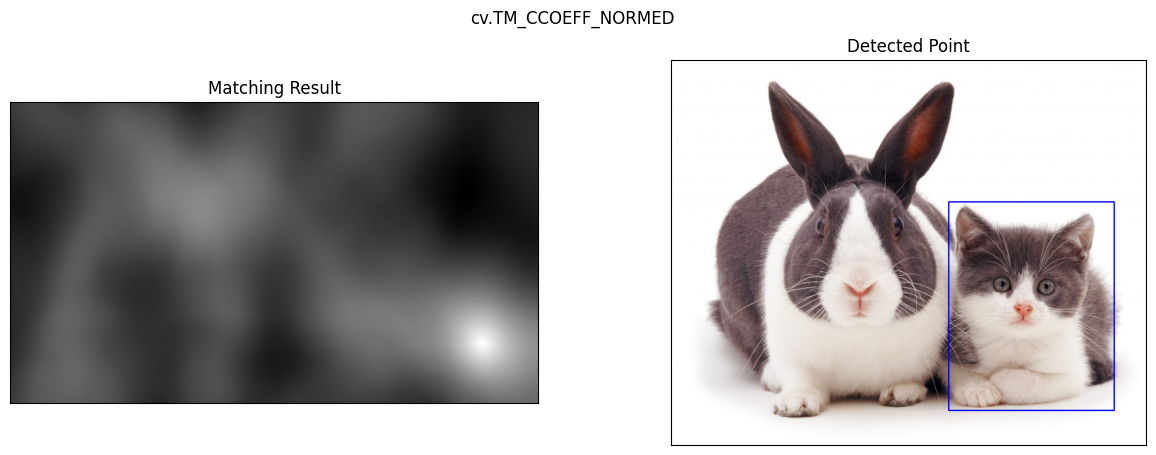

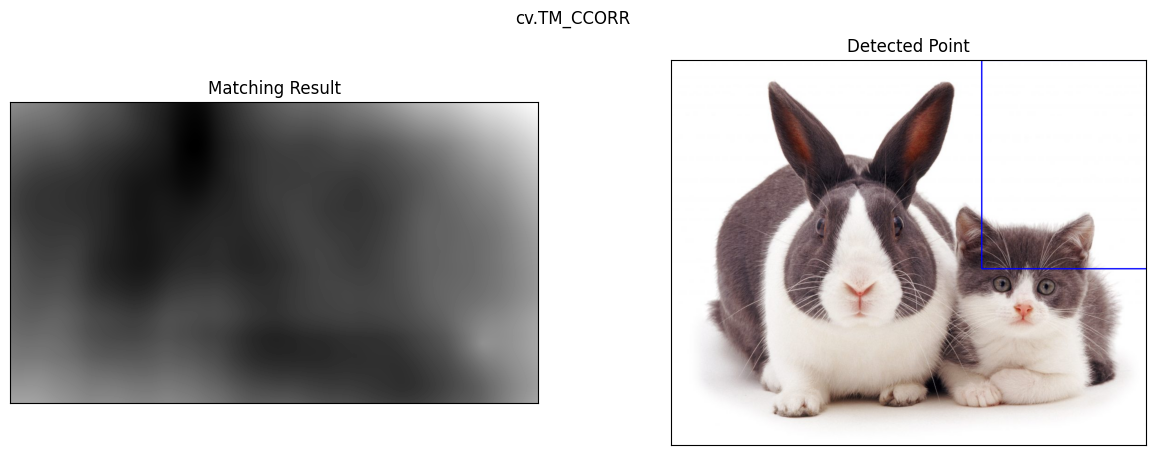

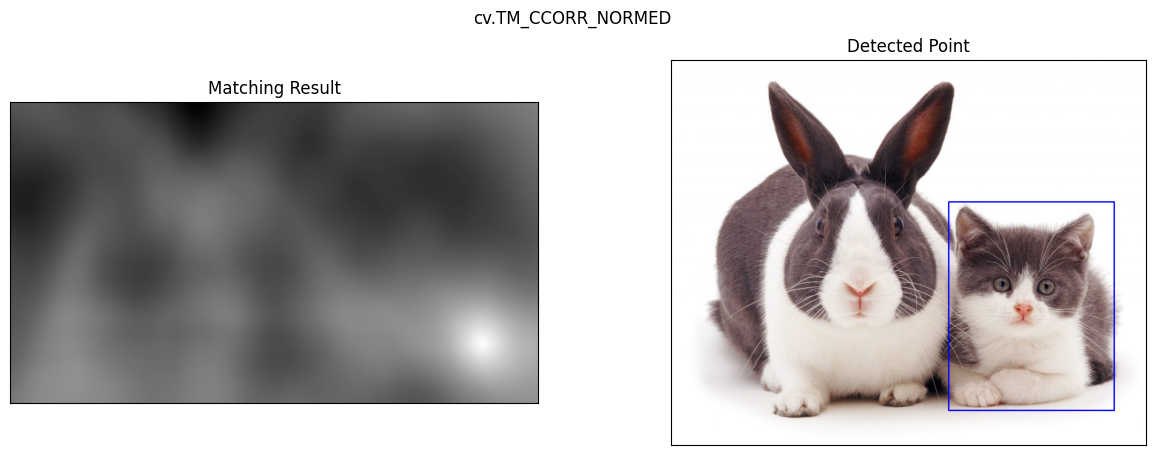

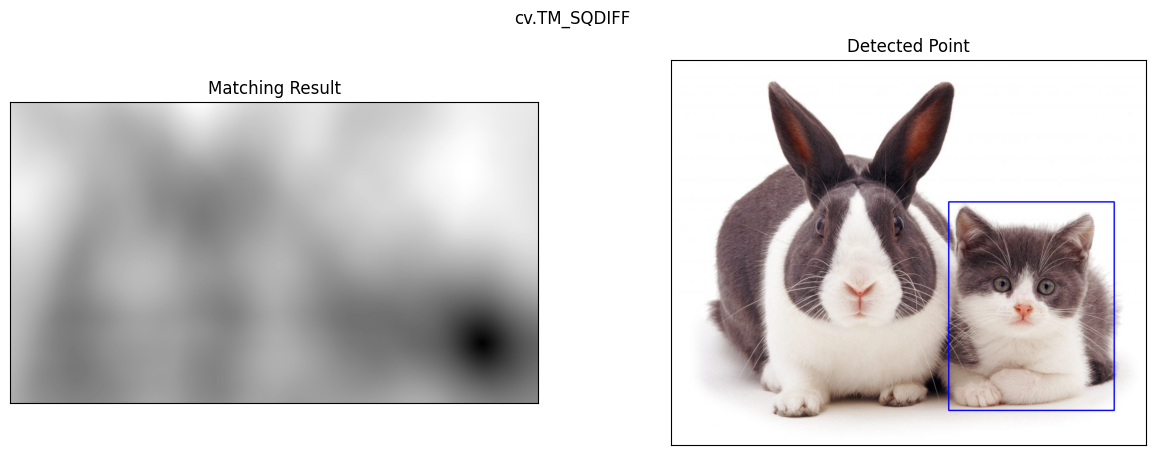

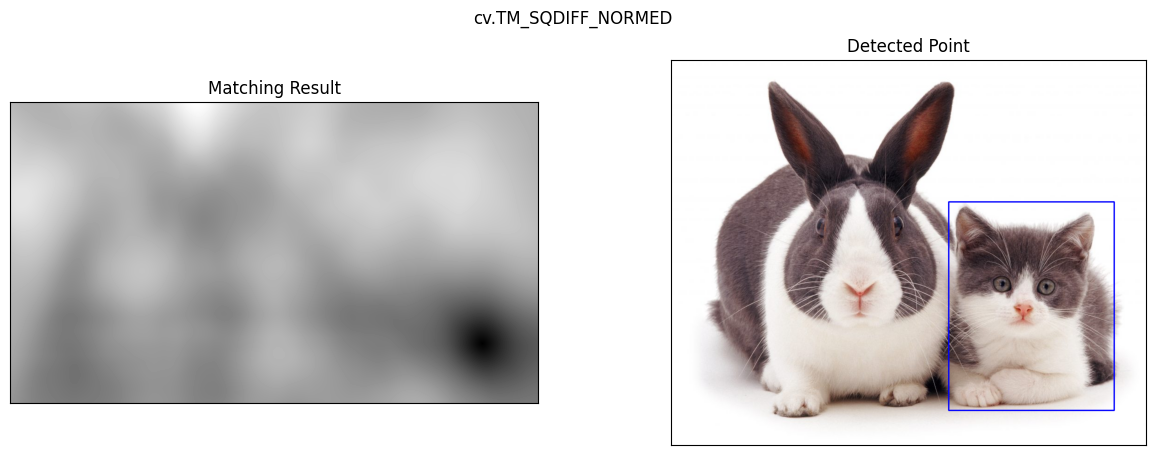

In [80]:
input_image = cv.cvtColor(cv.imread('drive/MyDrive/PCVK/images/Object Detection/cats_and_bunnies.jpg'), cv.COLOR_BGR2RGB)
input_image_gray = cv.cvtColor(cv.imread('drive/MyDrive/PCVK/images/Object Detection/cats_and_bunnies.jpg'), cv.COLOR_BGR2GRAY)
template_image = cv.cvtColor(cv.imread('drive/MyDrive/PCVK/images/Object Detection/cat2_templatejpg.jpg'), cv.COLOR_BGR2GRAY)
w, h = template_image.shape[::-1]

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(input_image)
plt.title('Input Image')
plt.subplot(122), plt.imshow(template_image, cmap='gray')
plt.title('Template Image')
# plt.imshow(input_image)

# Metode Template Matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method in methods:
    img = input_image.copy()
    method_name = eval(method)

    # Lakukan Template Matching
    res = cv.matchTemplate(input_image_gray, template_image, method_name)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Tentukan posisi hasil matching
    if method in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Gambar kotak di sekitar hasil matching
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil matching
    plt.figure(figsize=(15,5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)

    plt.show()

### Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

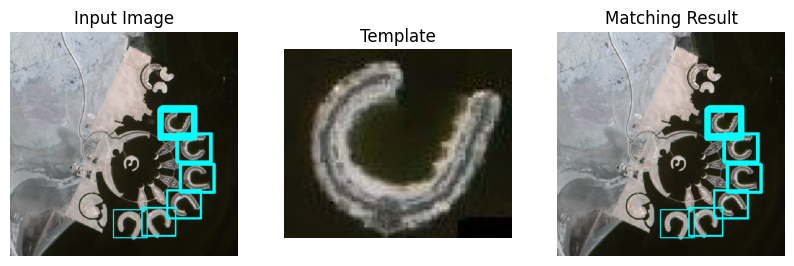

In [81]:
def template_matching(img, template):
    # Ubah gambar ke skala abu-abu
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

    # Temukan koefisien korelasi menggunakan matchTemplate
    result = cv.matchTemplate(gray_img, gray_template, cv.TM_CCOEFF_NORMED)

    # Tentukan batas ambang untuk deteksi
    threshold = 0.47
    locations = np.where(result >= threshold)

    # Gambar kotak di sekitar semua objek yang terdeteksi
    for pt in zip(*locations[::-1]):
        cv.rectangle(img, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 255), 2)

    return img

image = cv.imread('drive/MyDrive/PCVK/images/Object Detection/bahrain.jpg')
template = cv.imread('drive/MyDrive/PCVK/images/Object Detection/bahrain-template.jpg')
result = template_matching(image, template)

# Tampilkan hasil matching
plt.figure(figsize=(10, 5))

plt.subplot(131), plt.imshow(image)
plt.title('Input Image'), plt.axis('off')

plt.subplot(132), plt.imshow(template)
plt.title('Template'), plt.axis('off')

plt.subplot(133), plt.imshow(result)
plt.title('Matching Result'), plt.axis('off')

plt.show()

### Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

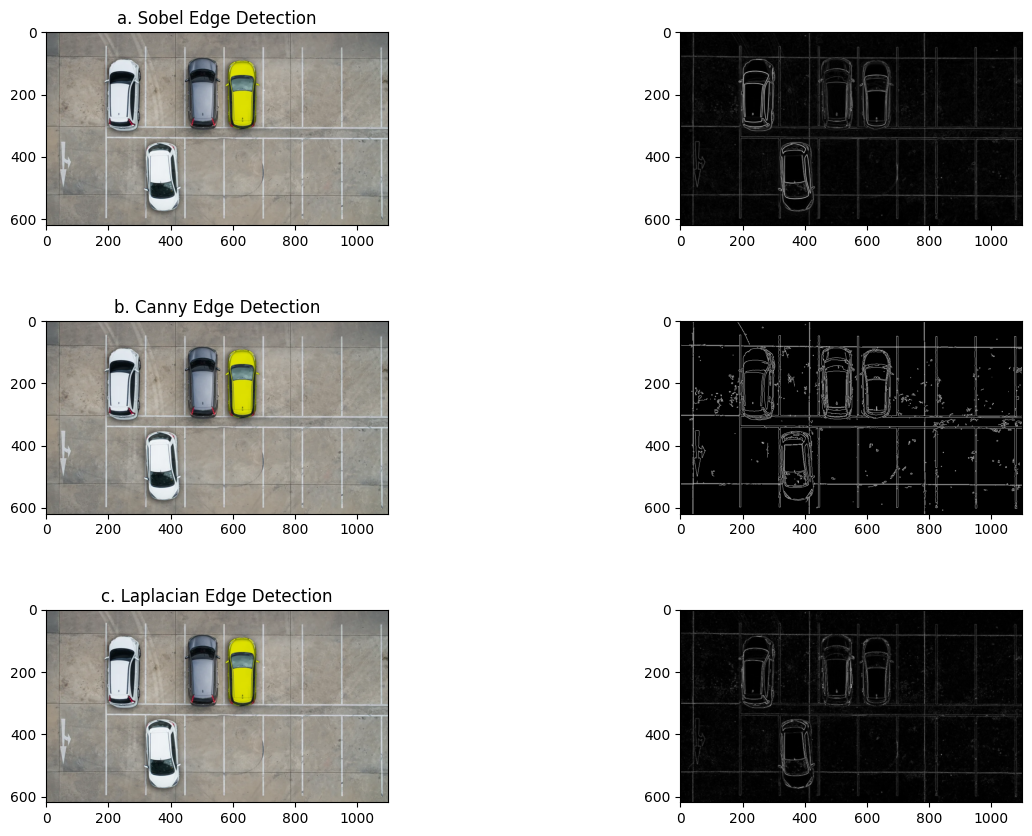

In [82]:
# Baca gambar
img = cv.imread('drive/MyDrive/PCVK/images/Object Detection/car-park.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# Metode Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Metode Canny Edge Detection
canny_edges = cv.Canny(img_gray, 50, 150)

# Metode Laplacian Edge Detection
laplacian = cv.Laplacian(img_gray, cv.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

# Tampilkan hasil
plt.figure(figsize=(15, 10))

# Baris 1
plt.subplot(321), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('a. Sobel Edge Detection')

plt.subplot(322), plt.imshow(sobel_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 2
plt.subplot(323), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('b. Canny Edge Detection')

plt.subplot(324), plt.imshow(canny_edges, cmap='gray')

plt.subplots_adjust(hspace=0.5)

# Baris 3
plt.subplot(325), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('c. Laplacian Edge Detection')

plt.subplot(326), plt.imshow(laplacian_edges, cmap='gray')

plt.show()

### Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan luaran sebagai berikut:

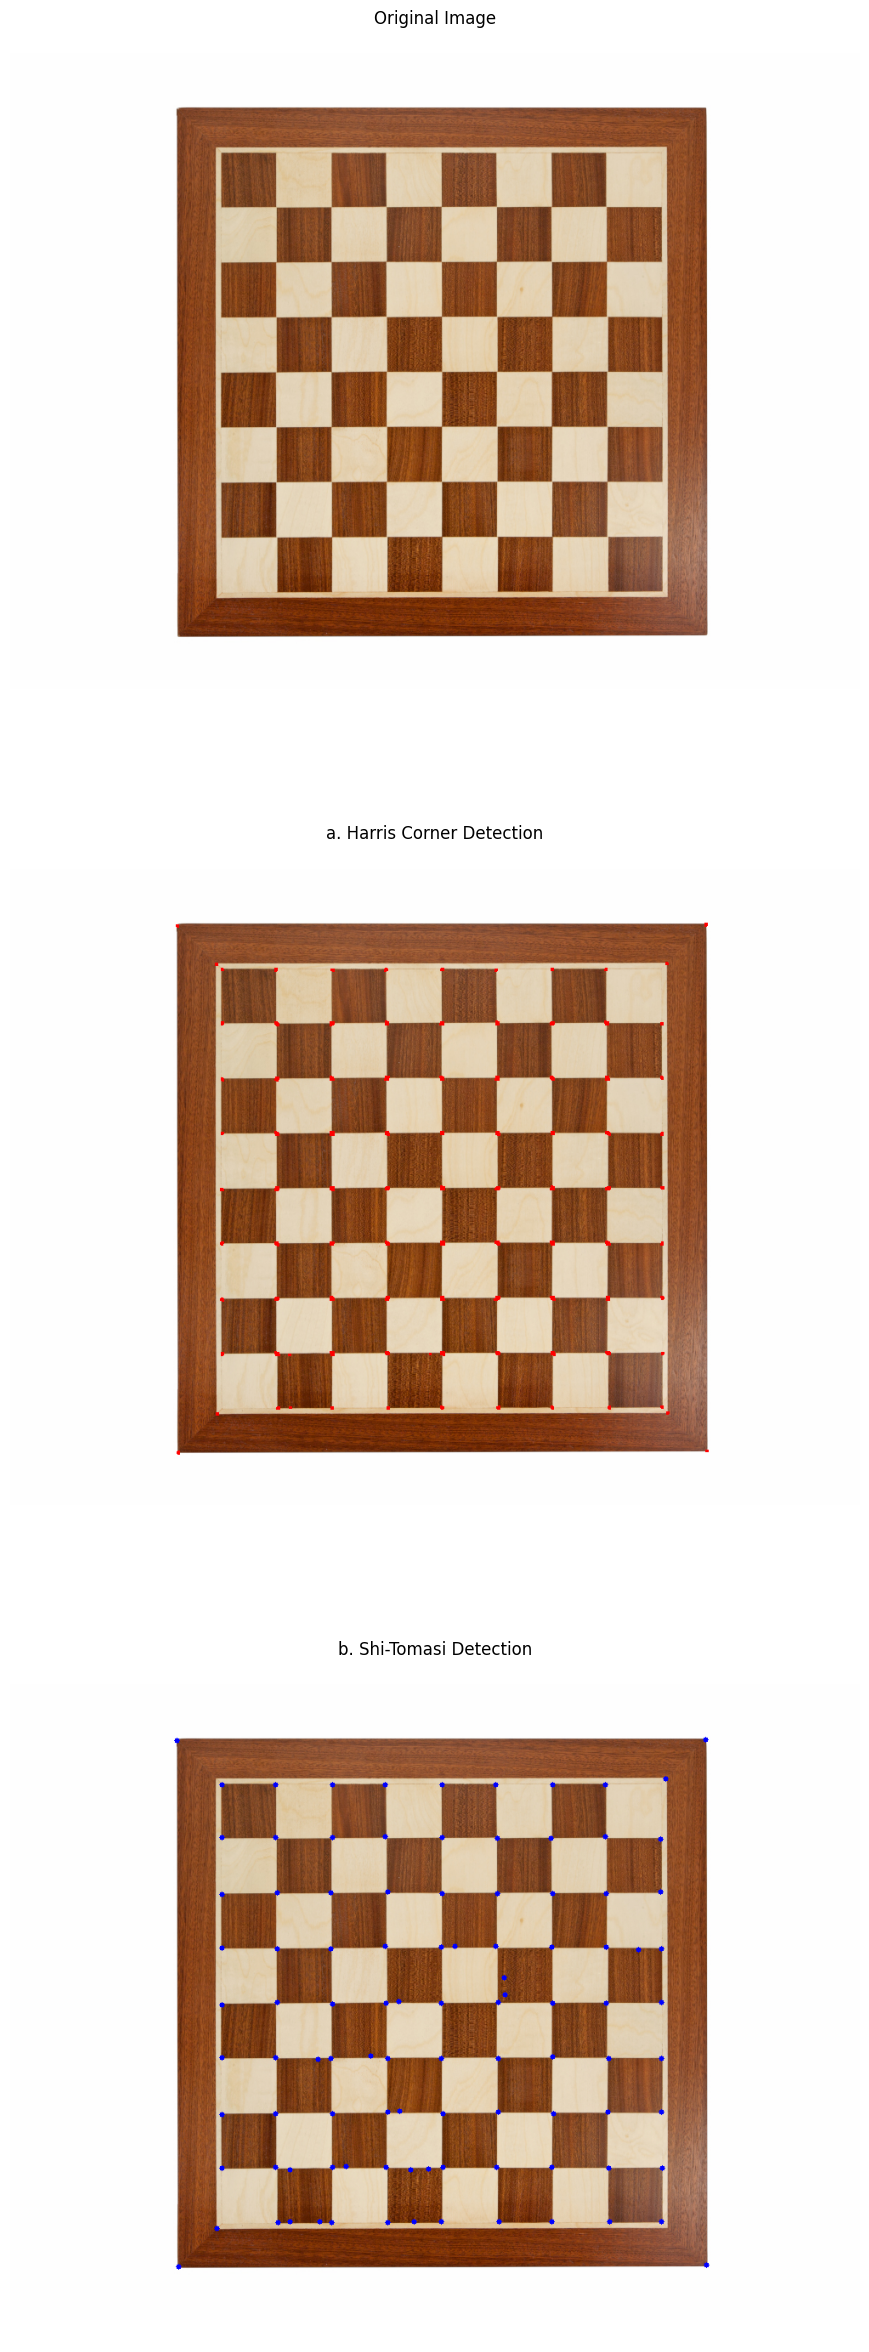

In [83]:
# Baca gambar
image = cv.imread('drive/MyDrive/PCVK/images/Object Detection/chess-board.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Metode Harris Corner Detection
harris_corners = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)  # Dilasi untuk memperjelas sudut

# Tampilkan sudut Harris pada gambar
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Warna merah untuk menandai sudut

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Tampilkan sudut Shi-Tomasi pada gambar
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image_shi_tomasi, (x, y), 3, 255, -1)  # Lingkaran dengan radius 3 pada sudut

# Tampilkan hasil
plt.figure(figsize=(30, 30))

plt.subplot(311), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')

plt.subplot(312), plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title('a. Harris Corner Detection'), plt.axis('off')

plt.subplot(313), plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('b. Shi-Tomasi Detection'), plt.axis('off')


plt.show()

### Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

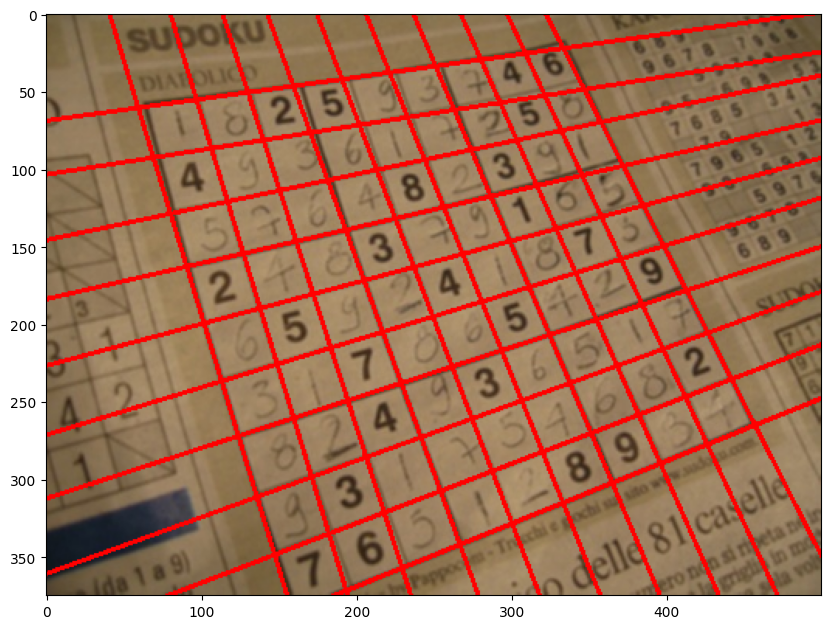

In [84]:
# Baca gambar
image = cv.imread('drive/MyDrive/PCVK/images/Object Detection/sudoku.jpg')

# Konversi ke citra keabuan
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi dengan Canny Edge Detection
edges = cv.Canny(gray, 90, 150, apertureSize=3)

# Dilasi untuk menghubungkan tepi yang terputus
kernel_dilate = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel_dilate, iterations=1)

# Erosi untuk memisahkan garis yang terlalu rapat
kernel_erode = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel_erode, iterations=1)

# Deteksi garis menggunakan HoughLines
lines = cv.HoughLines(edges, 1, np.pi/180, 150)

if not lines.any():
    print('Tidak ada garis yang ditemukan')
    exit()

# Filter garis yang mirip
rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue

    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

# Gambar garis pada citra asli
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

### Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

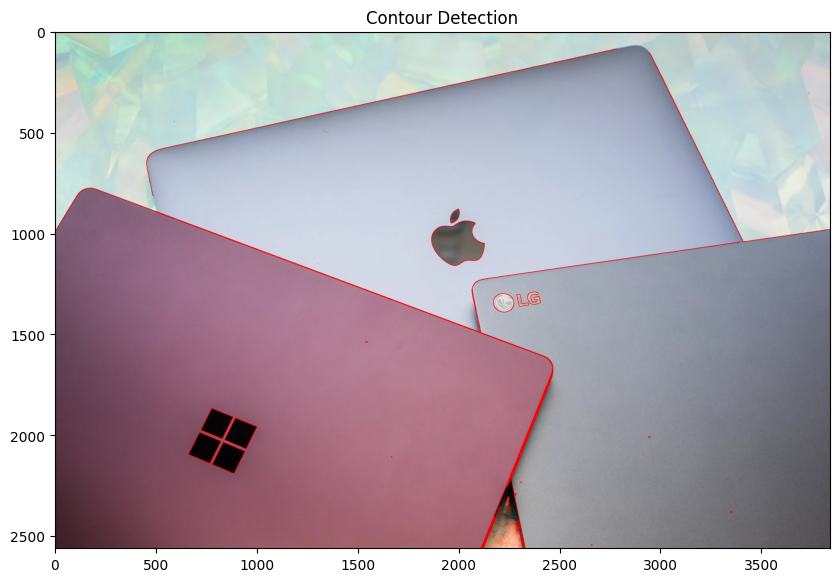

In [85]:
# Baca gambar
image = cv.imread('drive/MyDrive/PCVK/images/Object Detection/laptop.jpg')

# Konversi ke citra keabuan
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv.Canny(gray, 50, 200)

# Deteksi kontur
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Gambar kontur pada citra asli
image_contour = image.copy()
cv.drawContours(image_contour, contours, -1, (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image_contour, cv.COLOR_BGR2RGB))
plt.title('Contour Detection'), plt.axis('on')

plt.show()

# Pengayaan Materi KTP

### Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

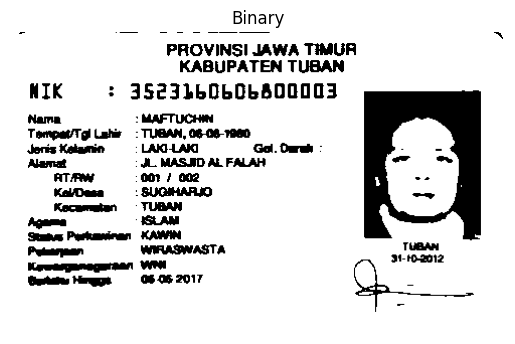

In [86]:
# Baca gambar
src = cv.imread('drive/MyDrive/PCVK/images/ktp/ktp3.png')
blurred = src.copy()
gray = blurred.copy()

# Filtering
blurred = cv.GaussianBlur(src, (5, 5), 0.5)

# Ubah ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binarisasi citra dengan Otsu's thresholding
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(bw, cmap = "gray")
plt.title('Binary'), plt.axis("off")
plt.show()


### Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

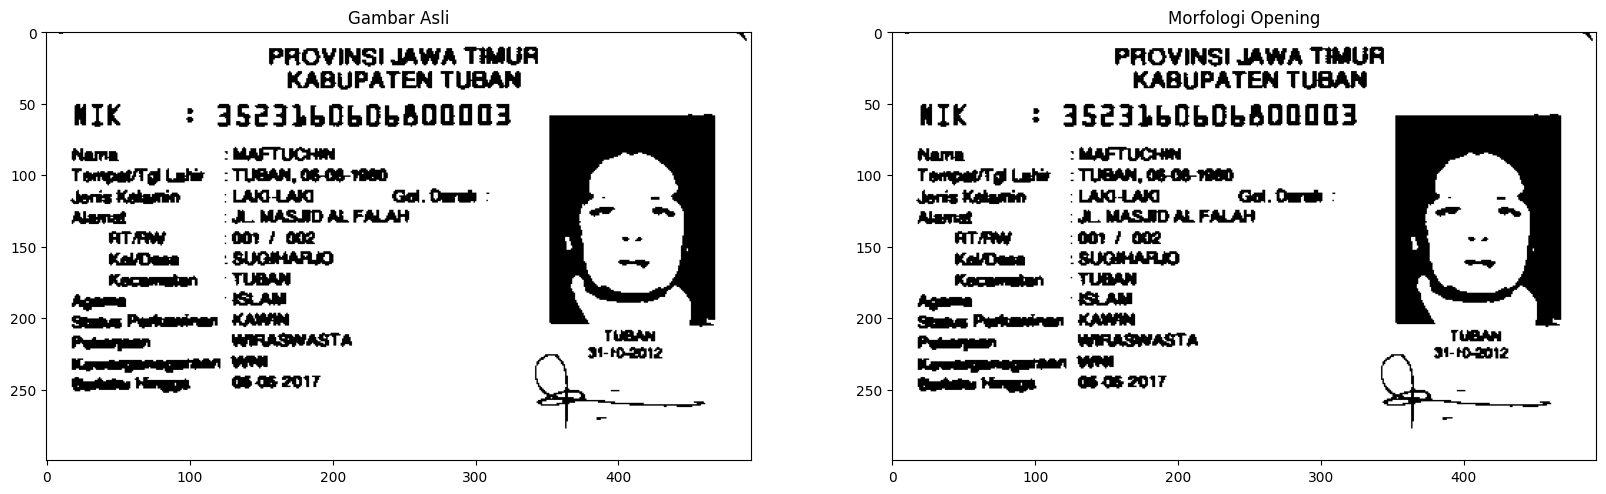

In [87]:
from scipy import ndimage

# inverse gambar
def inverse(img):
  return 1.0 - img

# Buat kernel untuk operasi morfologi
kernel = np.ones((1, 1), dtype=int)

# Definisikan operasi erosi
def erosion(image, kernel):
    return ndimage.grey_erosion(image, footprint=kernel)

# Operasi erosi
eroded_image = erosion(inverse(bw), kernel)

# Tampilkan gambar asli dan hasil operasi opening
plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(bw, 'gray'), plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(inverse(eroded_image), 'gray'), plt.title('Morfologi Opening')
plt.show()

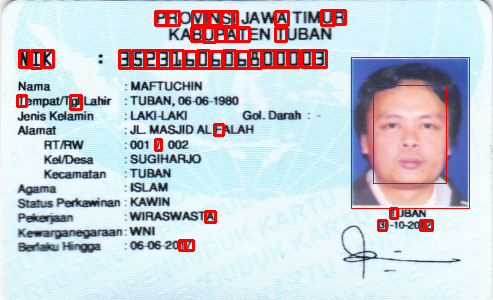

In [95]:
ktp = cv.imread("drive/MyDrive/PCVK/images/ktp/ktp3.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)

# Tugas Praktikum

### Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:
- Kelompok 1 – KTP Riyanto Sleman
- Kelompok 2 – KTP Galang Raka Bengkulu
- Kelompok 3 – KTP Arief Wijaya Cimahi
- Kelompok 4 – KTP Edo Nias
- Kelompok 5 – KTP Widiarso Bekasi
- Kelompok 6 – KTP Abdurrauf Soppeng

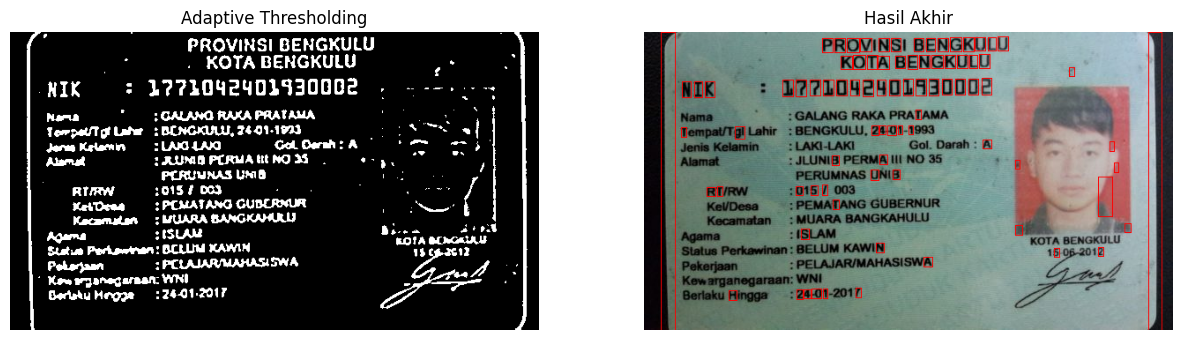

In [98]:
# Baca gambar
ktp = cv.imread("drive/MyDrive/PCVK/images/ktp/ktp1.png")

# Filtering dengan Gaussian Blur
blurred = cv.GaussianBlur(ktp, (7, 7), 0)

# Ubah ke citra keabuan
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi citra dengan Adaptive Thresholding
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(bw.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Gambar hasil biner
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(bw, cmap='gray')
plt.title('Adaptive Thresholding'), plt.axis('off')

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.subplot(122), plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.title('Hasil Akhir'), plt.axis('off')
plt.show()